In [1]:
# import all the useful lib in python
import h5py as h5
from matplotlib import pyplot as plt
from matplotlib import artist as art
%matplotlib inline
import numpy as np
import scipy as sp
#from sklearn.cluster import AgglomerativeClustering as AgCluster
# import pandas as pd
import pathlib
import os
import datetime as dt
import glob
from IPython.display import clear_output
from numpy.fft import fft, ifft

from h5analysis import get_data_from_file, get_file_path_by_date
from qsim_functions import*


/Users/thomassteckmann/Duke_Analog_ZNE_data/scripts
(51, 7)
(51, 7)


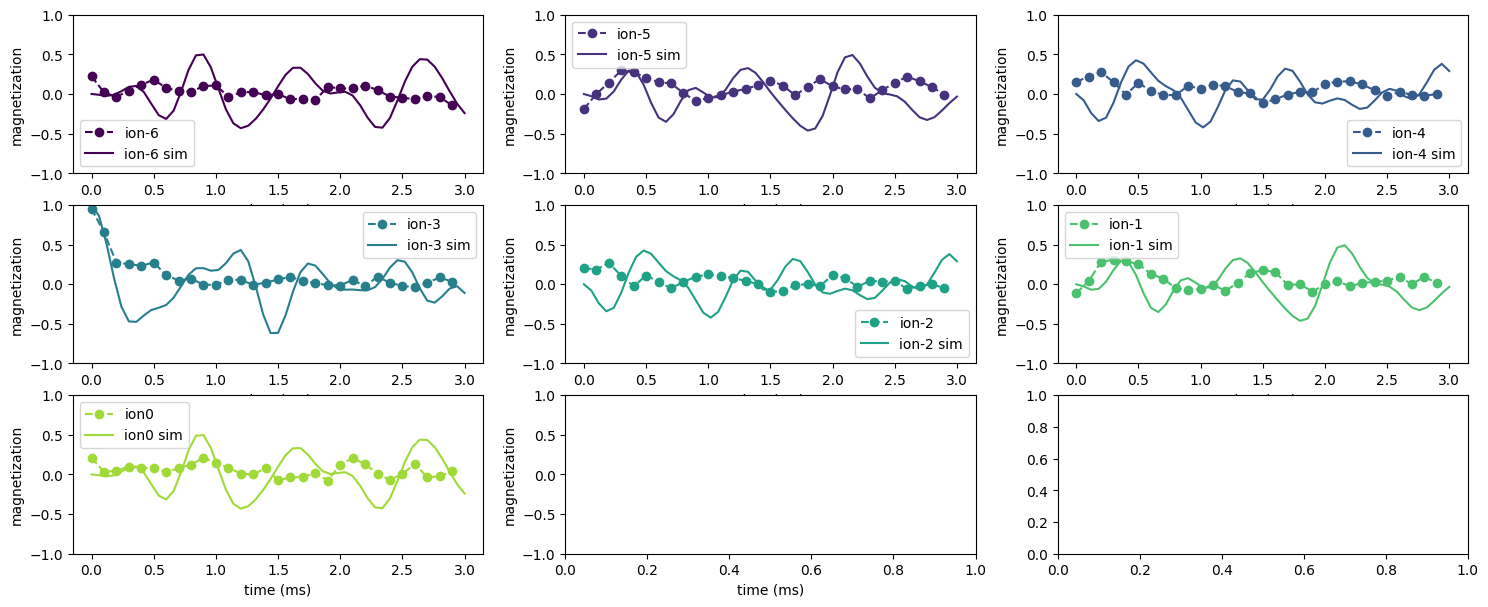

In [8]:
### individual data file analysis
import glob
####Plot of the magnetization with simulation

# rid = [str(i) for i in range(435980,435994)]+[str(i) for i in range(435996,436006)]
rid=['558486']
# Bx_list = [0.31,0.2,0.26,0.33,0.38,0.43,0.23,0.45,0.5,0.55,0,0.1,0.6,0.65,0.7,0.75,0.8,0.85,0.9,1,0.26,0.31,0.33,0.25]
str_len = 7

date='2024-07-10'
print(os.getcwd())
filepath=''#../data/JiJ_EXPERIMENT_600/'

cmp = plt.get_cmap('viridis')

print_flag = True
make_figure_flag = True
# for n in range(len(rid)):
for n in range(len(rid)):
    ## Exp data
    #file_path=get_file_path_by_date(rid=[rid[n]],date_str=date)
    file_path = '../data/JiJ_EXPERIMENT_600/000558487-RFSoCSequence.h5'
    data, x_values = get_data_from_file(file_path)
    # print(data.shape)
    n_pmts, n_shots, n_scan = data.shape
    pmt_ind = np.array([i for i in range(n_pmts)])
    data2=data[pmt_ind]
    # print(data[:,1])
    # np.array([np.mean([da[0],avg_mag[12]],axis=0),np.mean([avg_mag[1],avg_mag[11]],axis=0),np.mean([avg_mag[2],avg_mag[10]],axis=0),np.mean(avg_mag[3:10],axis=0)])
    data = (data*2 - 1)
    avg_mag=np.average(data,axis=1)
    # print('avgmag',avg_mag.shape)
    i0=int((n_pmts-str_len)/2)
    ifin=int((n_pmts+str_len)/2)
    avg_mag=avg_mag[i0:ifin]
    tmp=avg_mag[1]
    # avg_mag=avg_mag[4:11]
    # print('avg mag',np.shape(avg_mag))
    ion_avg_mag=np.mean(avg_mag,axis=0)

    scale_fac=1
    fname='Ising_Simulation.dat'
    # ion_data = np.genfromtxt(filepath+fname)
    # print(ion_data)
    #print(fname)
    tsteps=[]
    ion_data=[]

    with open (filepath+fname) as data_file :
        for line in data_file :
            line_list = line.strip('\n').split ('\t')
            tsteps.append(float (line_list[0]))
            ion_data.append(line_list[1:])
    print(np.shape(ion_data))
    for step in range(np.shape(ion_data)[0]):
        for i in range(np.shape(ion_data)[1]):
            ion_data[step][i]=float(ion_data[step][i])
    print(np.shape(ion_data))
    ion_data=np.array(ion_data)
    ion_avg_mag_sim = np.mean(ion_data, axis = -1)
    if make_figure_flag:
    ## plot individual and avg magnetization on a 2x3 grid. Last one is avg
        fig,ax=plt.subplots(3,3,figsize=(18,7))
        ax=[x for xs in ax for x in xs]
        for i in range(str_len+1):
            if i < str_len:
                x_values = np.arange(0,30)/30*3
                ax[i].plot(x_values*scale_fac,avg_mag[i],'o--',color = cmp(i/7))
                ax[i].plot(np.array(tsteps),ion_data[:,i],'-',color =cmp(i/7))
                ax[i].legend(['ion'+str(i-6),'ion'+str(i-6)+' sim'],loc=0)
            else:
                pass
                #ax[i].plot(x_values,ion_avg_mag,'o--',color = cmp(i/13))
                # ax[i].plot(tsteps,ion_avg_mag_sim,'-',color =cmp(i/13))
                #ax[i].legend(['average','average sim'],loc=1)
            ax[i].set_ylim([-1,1])

            # ax[i].set_ylim([-1,1])
            # ax[i].set_xlim([0,4])
            ax[i].set_xlabel('time (ms)')
            ax[i].set_ylabel('magnetization')


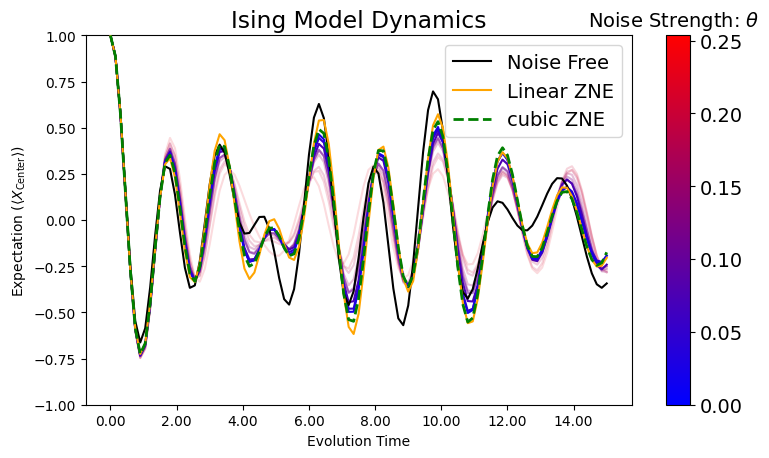